In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [4]:
df = pd.read_csv('cumulative_final.csv')

In [5]:
N_TIME_STEPS = 120
N_FEATURES = 34
step = 60
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):#starting point of each batch
    nose_x = df['nose_x'].values[i: i + N_TIME_STEPS]
    nose_y = df['nose_y'].values[i: i + N_TIME_STEPS]
    leftEye_x = df['leftEye_x'].values[i: i + N_TIME_STEPS]
    leftEye_y = df['leftEye_y'].values[i: i + N_TIME_STEPS]
    rightEye_x = df['rightEye_x'].values[i: i + N_TIME_STEPS]
    rightEye_y = df['rightEye_y'].values[i: i + N_TIME_STEPS]
    leftEar_x = df['leftEar_x'].values[i: i + N_TIME_STEPS]
    leftEar_y = df['leftEar_y'].values[i: i + N_TIME_STEPS]
    rightEar_x = df['rightEar_x'].values[i: i + N_TIME_STEPS]
    rightEar_y = df['rightEar_y'].values[i: i + N_TIME_STEPS]
    leftShoulder_x = df['leftShoulder_x'].values[i: i + N_TIME_STEPS]
    leftShoulder_y = df['leftShoulder_y'].values[i: i + N_TIME_STEPS]
    rightShoulder_x = df['rightShoulder_x'].values[i: i + N_TIME_STEPS]
    rightShoulder_y = df['rightShoulder_y'].values[i: i + N_TIME_STEPS]
    leftElbow_x = df['leftElbow_x'].values[i: i + N_TIME_STEPS]
    leftElbow_y = df['leftElbow_y'].values[i: i + N_TIME_STEPS]
    rightElbow_x = df['rightElbow_x'].values[i: i + N_TIME_STEPS]
    rightElbow_y = df['rightElbow_y'].values[i: i + N_TIME_STEPS]
    leftWrist_x = df['leftWrist_x'].values[i: i + N_TIME_STEPS]
    leftWrist_y = df['leftWrist_y'].values[i: i + N_TIME_STEPS]
    rightWrist_x = df['rightWrist_x'].values[i: i + N_TIME_STEPS]
    rightWrist_y = df['rightWrist_y'].values[i: i + N_TIME_STEPS]
    leftHip_x = df['leftHip_x'].values[i: i + N_TIME_STEPS]
    leftHip_y = df['leftHip_y'].values[i: i + N_TIME_STEPS]
    rightHip_x = df['rightHip_x'].values[i: i + N_TIME_STEPS]
    rightHip_y = df['rightHip_y'].values[i: i + N_TIME_STEPS]
    leftKnee_x = df['leftKnee_x'].values[i: i + N_TIME_STEPS]
    leftKnee_y = df['leftKnee_y'].values[i: i + N_TIME_STEPS]
    rightKnee_x = df['rightKnee_x'].values[i: i + N_TIME_STEPS]
    rightKnee_y = df['rightKnee_y'].values[i: i + N_TIME_STEPS]
    leftAnkle_x = df['leftAnkle_x'].values[i: i + N_TIME_STEPS]
    leftAnkle_y = df['leftAnkle_y'].values[i: i + N_TIME_STEPS]
    rightAnkle_x = df['rightAnkle_x'].values[i: i + N_TIME_STEPS]
    rightAnkle_y = df['rightAnkle_y'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['action'][i: i + N_TIME_STEPS])
    label = label[0][0]
    
    segments.append([nose_x, nose_y, leftEye_x, leftEye_y, rightEye_x,
   rightEye_y, leftEar_x, leftEar_y, rightEar_x, rightEar_y,
   leftShoulder_x, leftShoulder_y, rightShoulder_x,
   rightShoulder_y, leftElbow_x, leftElbow_y, rightElbow_x,
   rightElbow_y, leftWrist_x, leftWrist_y, rightWrist_x,
   rightWrist_y, leftHip_x, leftHip_y, rightHip_x, rightHip_y,
   leftKnee_x, leftKnee_y, rightKnee_x, rightKnee_y, leftAnkle_x,
   leftAnkle_y, rightAnkle_x, rightAnkle_y])
    
    labels.append(label)

In [6]:
np.array(segments).shape

(438, 34, 120)

In [7]:
reshaped_segments = np.asarray(segments, dtype = np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
reshaped_segments.shape

(438, 120, 34)

In [8]:
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [9]:
print(labels)
print(labels.shape)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]
(438, 4)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = 0)

In [11]:
len(X_train)

350

In [12]:
len(X_test)

88

In [13]:
N_HIDDEN_UNITS = 64
N_CLASSES = 4

In [14]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),  #34*64
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))    #64*4
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean = 1.0)),  # 64
        'output': tf.Variable(tf.random_normal([N_CLASSES]))                    # 4 
    }
    x = tf.transpose(inputs, [1, 0, 2])
    x = tf.reshape(x, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(x, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)
    
    #Stack 2 LSTM Layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)
    
    outputs, _= tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)
    
    lstm_last_output = outputs[-1]
    
    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [15]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name = 'input')
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [16]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
L2_LOSS = 0.0015

L2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y))

In [23]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y,1))#Finding the highest probability prediction
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [39]:
num_epochs = 25
batch_size= 100

In [40]:
saver = tf.train.Saver()
history = dict(train_loss = [],train_acc = [], test_loss = [], test_acc = [])
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
train_count = len(X_train)

for i in range(1, num_epochs + 1):
    for start, end in zip(range(0, train_count, batch_size),
                          range(batch_size, train_count + 1, batch_size)):
        sess.run(optimizer, feed_dict = {X: X_train[start:end],
                                        Y: y_train[start:end]})
    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict = {X: X_train, Y: y_train})
    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict = {X : X_test, Y: y_test})
    
    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)
    #if i !=1 and i%10 !=0:
     #   continue
    print(f'epoch : {i} train acc : {acc_train} train_loss : {loss_train} test acc : {acc_test} test_loss: {loss_test}')

predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict = {X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


epoch : 1 train acc : 0.37142857909202576 train_loss : 1.4625080823898315 test acc : 0.3636363744735718 test_loss: 1.4252594709396362
epoch : 2 train acc : 0.5199999809265137 train_loss : 1.0715352296829224 test acc : 0.5227272510528564 test_loss: 1.1036758422851562
epoch : 3 train acc : 0.4828571379184723 train_loss : 1.1808701753616333 test acc : 0.4545454680919647 test_loss: 1.227617621421814
epoch : 4 train acc : 0.5714285969734192 train_loss : 0.9648236036300659 test acc : 0.5227272510528564 test_loss: 0.9977536797523499
epoch : 5 train acc : 0.5914285778999329 train_loss : 0.9388808012008667 test acc : 0.5681818127632141 test_loss: 0.8934299945831299
epoch : 6 train acc : 0.5171428322792053 train_loss : 0.9967186450958252 test acc : 0.5340909361839294 test_loss: 1.0148030519485474
epoch : 7 train acc : 0.6057142615318298 train_loss : 0.8812719583511353 test acc : 0.6136363744735718 test_loss: 0.8798016905784607
epoch : 8 train acc : 0.5657142996788025 train_loss : 0.8841790556907

In [34]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history['train_acc'])
    plt.plot(epoch_range, history['test_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc = 'lower right')
    plt.show()
    
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history['train_loss'])
    plt.plot(epoch_range, history['test_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Val'], loc = 'upper right')
    plt.show()

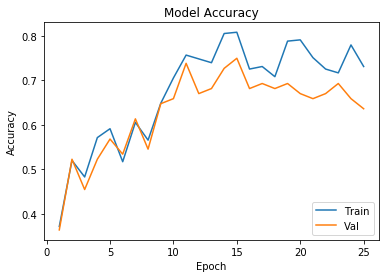

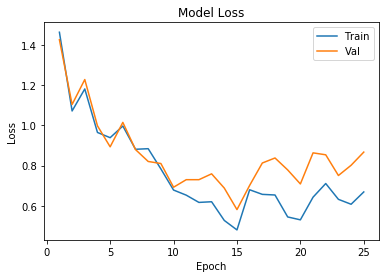

In [41]:
plot_learningCurve(history, 25)